In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [ ]:
plt.rcParams['figure.figsize'] = (12, 4)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Load Dataset

In [ ]:
sales_df = pd.read_csv('data/train.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


sales_df
* Id - an Id that represents a (Store, Date) duple within the test set
* Store - a unique Id for each store
* Sales - the turnover for any given day (this is what you are predicting)
* Customers - the number of customers on a given day
* Open - an indicator for whether the store was open: 0 = closed, 1 = open
* StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

In [ ]:
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
sales_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [ ]:
sales_df.info() # No null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
sales_df.describe()
# Average daily sales is 5773.819 (in Euro). Minimum daily sales is 0 (when the store is closed). Maximum daily sales is 41551
# Avearge number of customer is 633, Minimum is 0, Maximum is 7388
# Other variables are catogorical.

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.000,1017209.000,1017209.000,1017209.000,1017209.000,1017209.000,1017209.000
mean,558.430,3.998,5773.819,633.146,0.830,0.382,0.179
std,321.909,1.997,3849.926,464.412,0.376,0.486,0.383
min,1.000,1.000,0.000,0.000,0.000,0.000,0.000
25%,280.000,2.000,3727.000,405.000,1.000,0.000,0.000
50%,558.000,4.000,5744.000,609.000,1.000,0.000,0.000
75%,838.000,6.000,7856.000,837.000,1.000,1.000,0.000
max,1115.000,7.000,41551.000,7388.000,1.000,1.000,1.000


In [ ]:
store_df = pd.read_csv('data/store.csv')

store_df
* StoreType - differentiates between 4 different store models: a, b, c, d
* Assortment - describes an assortment level: a = basic, b = extra, c = extended
* CompetitionDistance - distance in meters to the nearest competitor store
* CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* Promo - indicates whether a store is running a promo on that day
* Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [ ]:
store_df.head() 

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.000,9.000,2008.000,0,NaN,NaN,NaN
1,2,a,a,570.000,11.000,2007.000,1,13.000,2010.000,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.000,12.000,2006.000,1,14.000,2011.000,"Jan,Apr,Jul,Oct"
3,4,c,c,620.000,9.000,2009.000,0,NaN,NaN,NaN
4,5,a,a,29910.000,4.000,2015.000,0,NaN,NaN,NaN


In [ ]:
store_df.info() # null value exists in multiple rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
store_df.describe()

# Average distance with competitor is 5404 meters (apprx 5km)

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.000,1112.000,761.000,761.000,1115.000,571.000,571.000
mean,558.000,5404.901,7.225,2008.669,0.512,23.595,2011.764
std,322.017,7663.175,3.212,6.196,0.500,14.142,1.675
min,1.000,20.000,1.000,1900.000,0.000,1.000,2009.000
25%,279.500,717.500,4.000,2006.000,0.000,13.000,2011.000
50%,558.000,2325.000,8.000,2010.000,1.000,22.000,2012.000
75%,836.500,6882.500,10.000,2013.000,1.000,37.000,2013.000
max,1115.000,75860.000,12.000,2015.000,1.000,50.000,2015.000



## Exploratory Data Analysis

### Sales Dataframe

In [ ]:
sales_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
sales_df['Promo'] = sales_df['Promo'].astype('int')
sales_df['Date'] = sales_df['Date'].astype('datetime64[D]')

In [ ]:
sales_num = ['Sales', 'Customers']
sales_cat = ['DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']

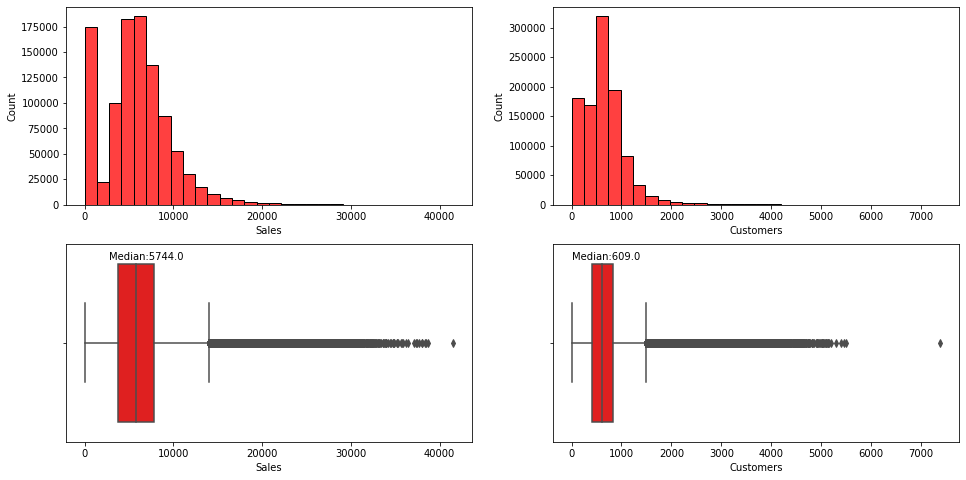

In [ ]:
# Distribution of numerical columns
fig, axes = plt.subplots(2,2, figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(x = sales_df[sales_num[0]], color = 'r', bins=30)
plt.subplot(2,2,2)
sns.histplot(x = sales_df[sales_num[1]], color = 'r', bins=30)
plt.subplot(2,2,3)
sns.boxplot(x = sales_df[sales_num[0]], color = 'r')
median1 = sales_df[sales_num[0]].median()
plt.text(median1-3000,-0.42 ,'Median:'+str(median1), fontsize=10)
plt.subplot(2,2,4)
sns.boxplot(x = sales_df[sales_num[1]], color = 'r')
median2 = sales_df[sales_num[1]].median()
plt.text(0,-0.42 ,'Median:'+str(median2), fontsize=10)

plt.show()



*   Daily Sales (per store) mostly fall into 3000-1000 Euro, except for those with 0 sales when the stores are closed
*   Daily numbers of customers are mostly > 1000 . 



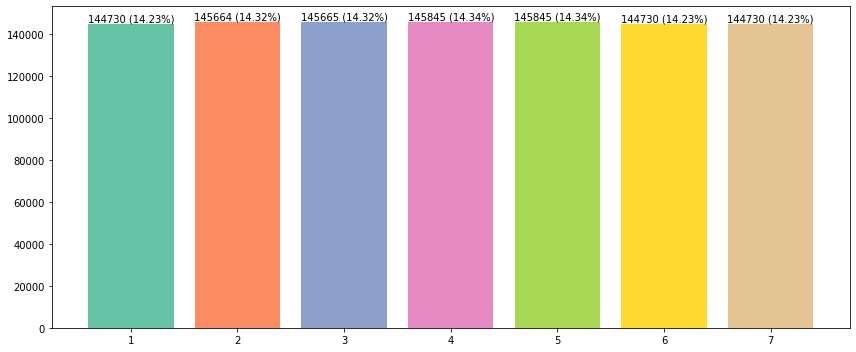

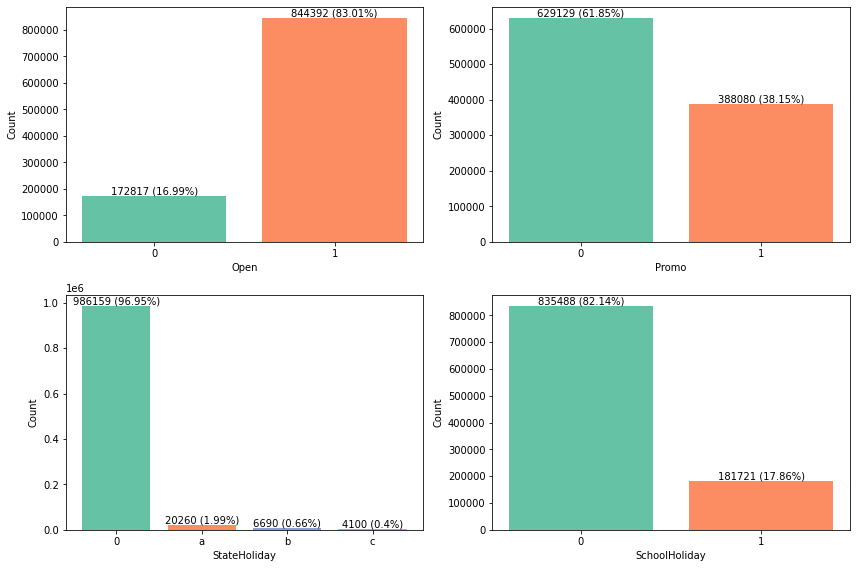

In [ ]:
# Distribution of categorical columns
f , ax = plt.subplots(figsize=(12,5))
sns.color_palette("Set2")
a = sales_df[sales_cat[0]].astype('str').value_counts().sort_index()
bars=ax.bar(a.index, a.values, color=sns.color_palette("Set2"))
ax.bar_label(bars, labels=[str(j)+' ('+str(round(100*j/sum(a),2))+'%)' for j in a])
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2,2, figsize=(12,8))

for i in range(1,len(sales_cat)):
  a = sales_df[sales_cat[i]].astype('str').value_counts().sort_index()
  bars=axes[(i-1)//2,(i-1)%2].bar(a.index, a.values, color=sns.color_palette("Set2"))
  axes[(i-1)//2,(i-1)%2].bar_label(bars, labels=[str(j)+' ('+str(round(100*j/sum(a),2))+'%)' for j in a])
  #plt.xticks(rotation = 'horizontal')
  axes[(i-1)//2,(i-1)%2].set_xlabel(sales_cat[i])
  axes[(i-1)//2,(i-1)%2].set_ylabel('Count')

plt.tight_layout()
plt.show()



*   DayOfWeek is evenly distribution in the dataset. 
*   ~83% of the (date, store) is open.
*   ~38% of the (date, store) has promotion. 
*   Only ~3% of the time is state holidays.
*   ~18% of the time is school holidays.



In [ ]:
print('Total number of records (date, store):', len(sales_df) )
print('Number of records (date, store) which are Open:', len(sales_df[sales_df['Open'] == 1]))
print('Number of records (date, store) which are Closed:', len(sales_df[sales_df['Open'] == 0]))

Total number of records (date, store): 1017209
Number of records (date, store) which are Open: 844392
Number of records (date, store) which are Closed: 172817


In [ ]:
# Only keepthe open data
sales_df = sales_df[sales_df['Open'] == 1]
sales_df.drop(['Open'], axis =1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
sales_df.describe()
# Average sales is 6855.514 Euro (comparing with 5773.819 before)
# Average number of customer is 762.728 (comparing with 633.146 before)

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000,844392.000,844392.000,844392.000,844392.000,844392.000
mean,558.423,3.520,6955.514,762.728,0.446,0.194
std,321.732,1.724,3104.215,401.228,0.497,0.395
min,1.000,1.000,0.000,0.000,0.000,0.000
25%,280.000,2.000,4859.000,519.000,0.000,0.000
50%,558.000,3.000,6369.000,676.000,0.000,0.000
75%,837.000,5.000,8360.000,893.000,1.000,0.000
max,1115.000,7.000,41551.000,7388.000,1.000,1.000


### Store Dtaframe

<AxesSubplot:>

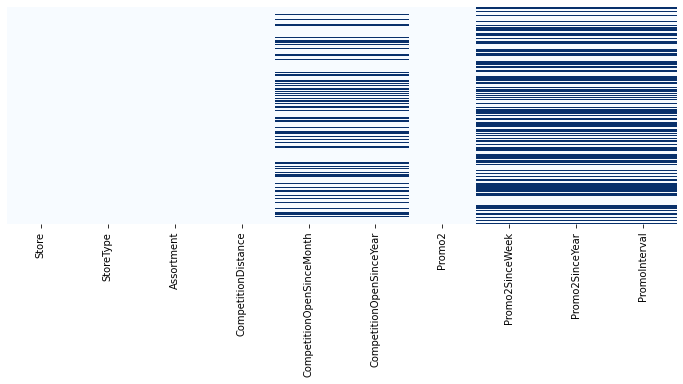

In [ ]:
# Check null data by heatmap
sns.heatmap(store_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [ ]:
store_df.info()
# CompetitionDistance: 1112 non-null vs 3 null
# CompetitionSinceMonth, CompetitionSinceYear: 761 non-null vs 352 null (31.57%)
# Promo2SinceWeek, Promo2SinceYear, PromoInterval: 571 non-null vs 544 null (48.79%)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
store_df[store_df['Promo2']==0].count()
# When 'Promo2' is zero, 'Promo2SinceWeek', 'Promo2SinceYear' ans 'PromoInterval' are set to zero

Store                        544
StoreType                    544
Assortment                   544
CompetitionDistance          542
CompetitionOpenSinceMonth    396
CompetitionOpenSinceYear     396
Promo2                       544
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                  0
dtype: int64

In [ ]:
# Deal with null values
for col in ['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval']:
  store_df[col].fillna(0, inplace=True)

store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].mean(), inplace=True)

# Clean data types
store_df[['CompetitionDistance','Promo2SinceWeek','Promo2SinceYear','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']] = store_df[['CompetitionDistance','Promo2SinceWeek','Promo2SinceYear','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']].astype(int)
store_df['Promo2'] = store_df['Promo2'].astype('category')

In [ ]:
store_cat = ['StoreType','Assortment','Promo2','PromoInterval',]
store_num = ['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear'] 

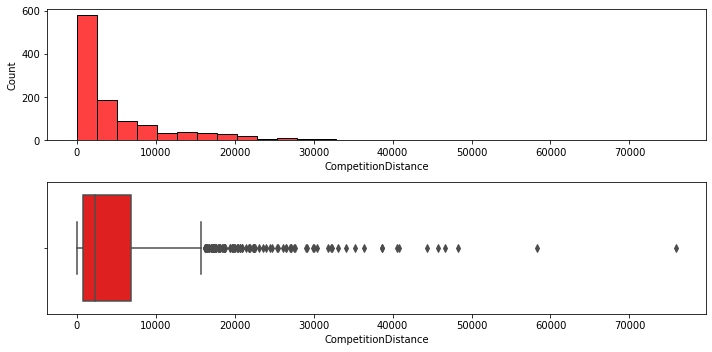

In [ ]:
# Distribution of numerical columns
fig, axes = plt.subplots(2,1, figsize=(10,5))

plt.subplot(2,1,1)
sns.histplot(x = store_df[store_num[0]], color = 'r', bins=30)
plt.subplot(2,1,2)
sns.boxplot(x = store_df[store_num[0]], color = 'r')


plt.tight_layout()
plt.show()

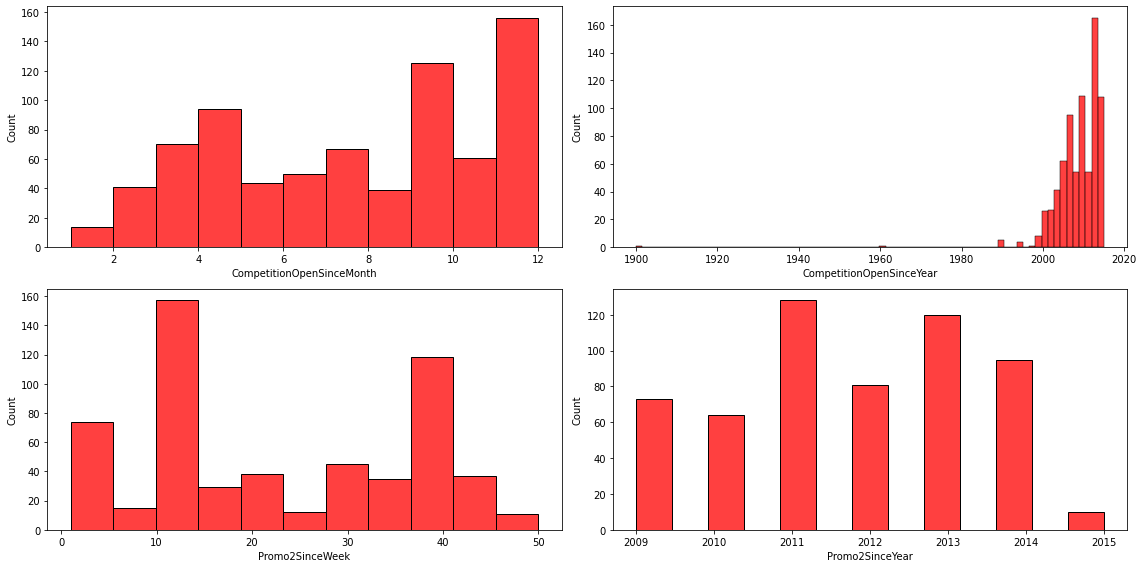

In [ ]:
# Distribution of date columns
fig, axes = plt.subplots(2,2, figsize=(16,8))

plt.subplot(2,2,1)
sns.histplot(x = store_df[store_df[store_num[1]]>0][store_num[1]], color = 'r')
plt.subplot(2,2,2)
sns.histplot(x = store_df[store_df[store_num[2]]>0][store_num[2]], color = 'r')
plt.subplot(2,2,3)
sns.histplot(x = store_df[store_df[store_num[3]]>0][store_num[3]], color = 'r')
plt.subplot(2,2,4)
sns.histplot(x = store_df[store_df[store_num[4]]>0][store_num[4]], color = 'r')


plt.tight_layout()
plt.show()

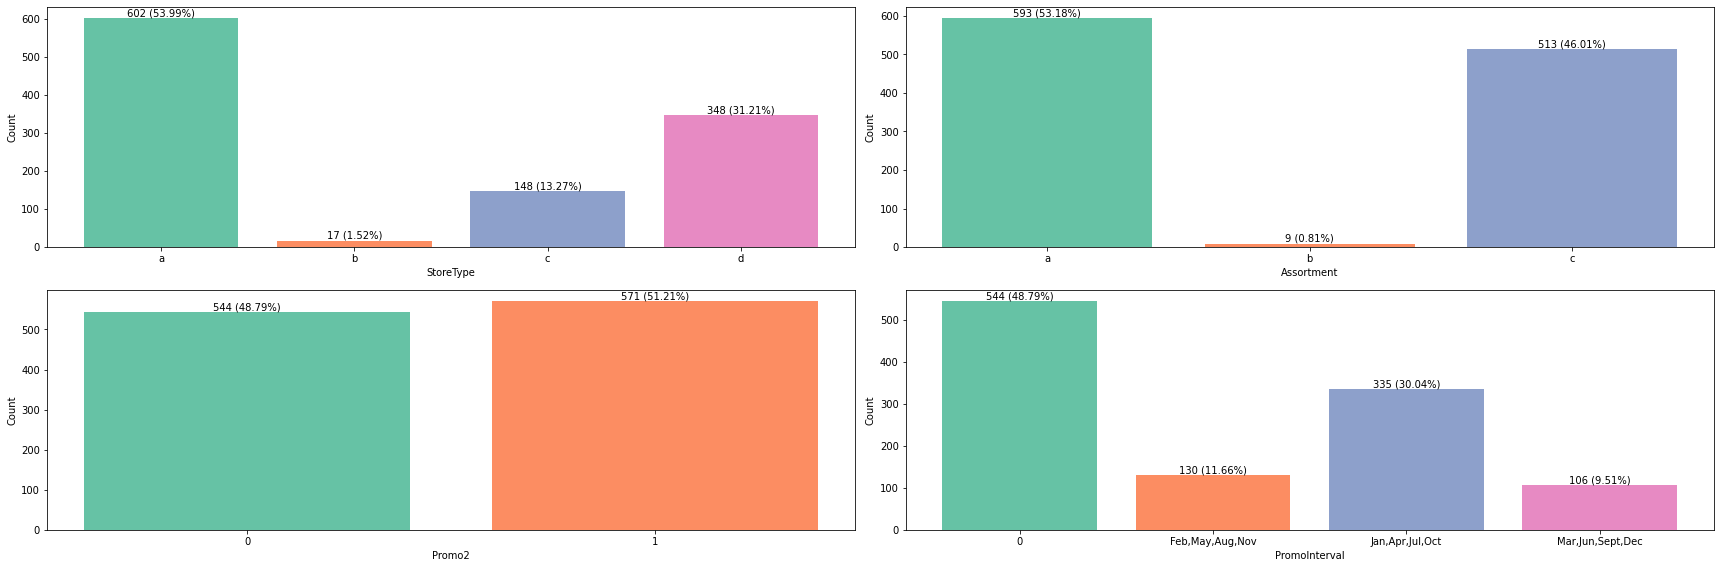

In [ ]:
# Distribution of categorical columns
fig, axes = plt.subplots(2,2, figsize=(24,8))

for i in range(0,len(store_cat)):
  a = store_df[store_cat[i]].astype('str').value_counts().sort_index()
  bars=axes[(i)//2,(i)%2].bar(a.index, a.values,color=sns.color_palette("Set2"))
  axes[(i)//2,(i)%2].bar_label(bars, labels=[str(j)+' ('+str(round(100*j/sum(a),2))+'%)' for j in a])
  #plt.xticks(rotation = 'horizontal')
  axes[(i)//2,(i)%2].set_xlabel(store_cat[i])
  axes[(i)//2,(i)%2].set_ylabel('Count')

plt.tight_layout()
plt.show()

### Combined Dataframe (Multivariate Analysis)

In [ ]:
# merge two dataframe into one
sales_df_all = pd.merge(sales_df, store_df, how='inner', on='Store')
sales_df_all.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270,9,2008,0,0,0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270,9,2008,0,0,0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270,9,2008,0,0,0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270,9,2008,0,0,0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270,9,2008,0,0,0,0


In [ ]:
sales_df_all.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
sales_df_all.corr()['Sales'].sort_values()

DayOfWeek                   -0.179
Promo2SinceYear             -0.128
Promo2SinceWeek             -0.058
CompetitionDistance         -0.036
CompetitionOpenSinceMonth   -0.018
CompetitionOpenSinceYear     0.005
Store                        0.008
SchoolHoliday                0.039
Customers                    0.824
Sales                        1.000
Name: Sales, dtype: float64

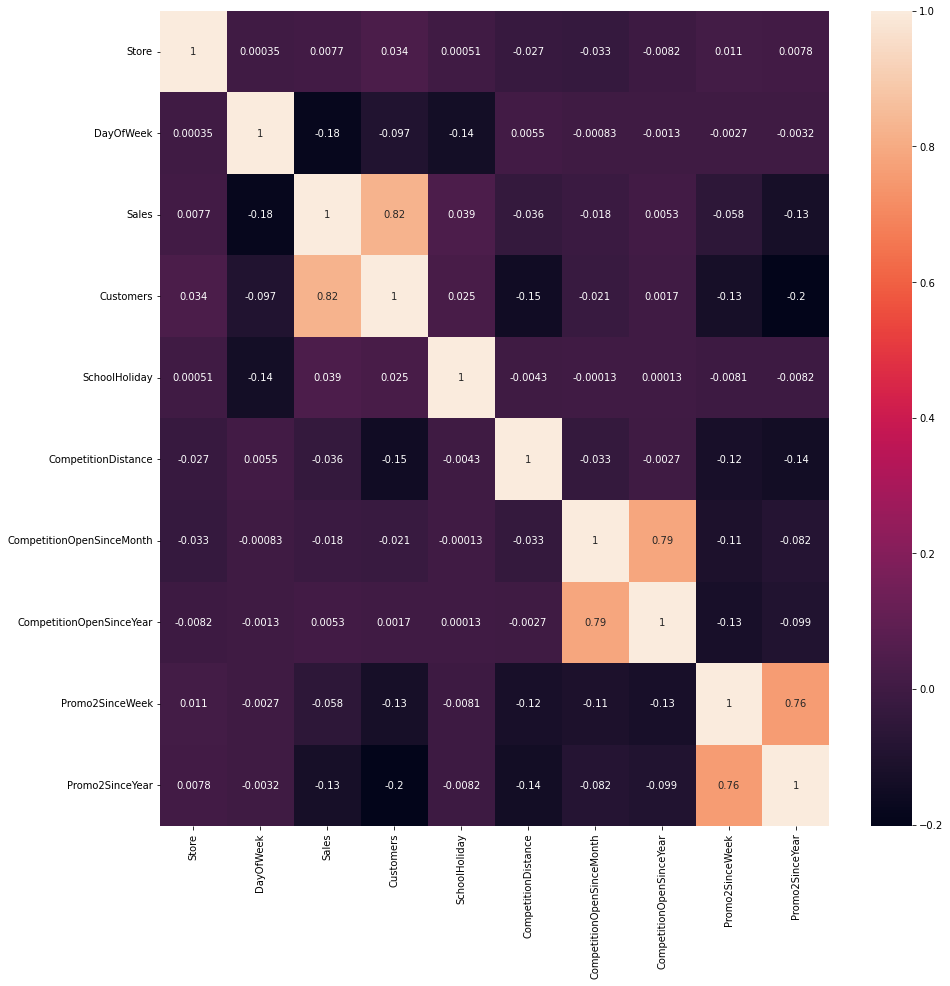

In [ ]:
corr = sales_df_all.corr()
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True)
plt.show()

# Sales is strongly positive-correlated to number of customers. (it makes sense that more cutsomers lead to higher sales.)
# Promo is positive-correlated to Sales and number of customers (also makes sense that promotions attract more customers and customers buy more due to promotion.)
# Surprisingly, Number of customers has a negative correlation with CompetitionDistance, Promo2.
# (Shorter distance <-> fewer customer and vice versa), and (fewer customers <-> promo2 undergoing)

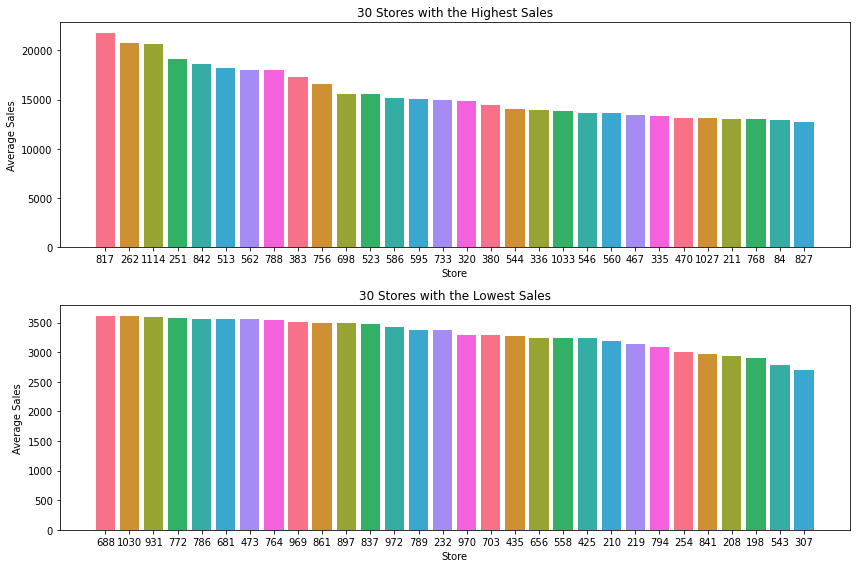

In [ ]:
fig, axes = plt.subplots(2,1,figsize=(12,8))

a = sales_df_all.groupby('Store')['Sales'].mean().sort_values(ascending=False)[:30]
bars = axes[0].bar(a.index.astype(str), a.values, color = sns.color_palette("husl", 8))
m = sales_df_all.groupby('Store')['Sales'].mean().sort_values().mean()
axes[0].set_title('30 Stores with the Highest Sales')
axes[0].set_xlabel('Store')
axes[0].set_ylabel('Average Sales')
#plt.axhline(y=m,linewidth=1, color='red')
#plt.text(34, m, 'Average:'+ str(round(m,2)), fontsize=13, va='center', ha='center', color = 'red')

b = sales_df_all.groupby('Store')['Sales'].mean().sort_values(ascending=False)[-30:]
bars = axes[1].bar(b.index.astype(str), b.values, color = sns.color_palette("husl", 8))
axes[1].set_title('30 Stores with the Lowest Sales')
axes[1].set_xlabel('Store')
axes[1].set_ylabel('Average Sales')


plt.tight_layout()
plt.show()

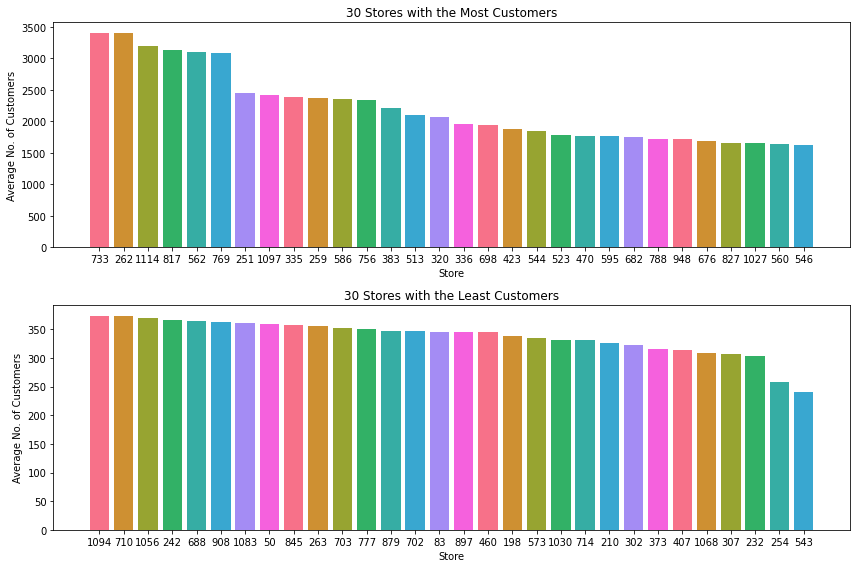

In [ ]:
fig, axes = plt.subplots(2,1,figsize=(12,8))

a = sales_df_all.groupby('Store')['Customers'].mean().sort_values(ascending=False)[:30]
bars = axes[0].bar(a.index.astype(str), a.values, color = sns.color_palette("husl", 8))
m = sales_df_all.groupby('Store')['Customers'].mean().sort_values().mean()
axes[0].set_title('30 Stores with the Most Customers')
axes[0].set_xlabel('Store')
axes[0].set_ylabel('Average No. of Customers')

b = sales_df_all.groupby('Store')['Customers'].mean().sort_values(ascending=False)[-30:]
bars = axes[1].bar(b.index.astype(str), b.values, color = sns.color_palette("husl", 8))
axes[1].set_title('30 Stores with the Least Customers')
axes[1].set_xlabel('Store')
axes[1].set_ylabel('Average No. of Customers')


plt.tight_layout()
plt.show()

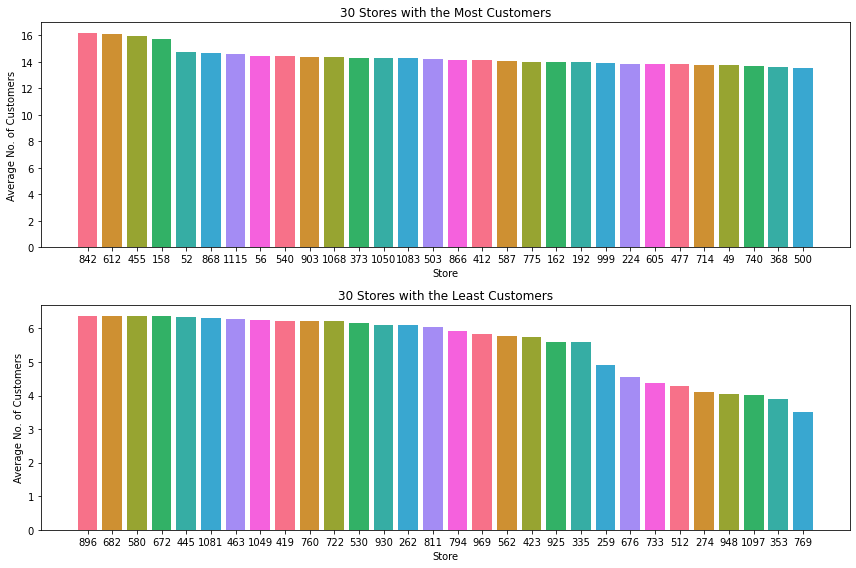

In [ ]:
df_sales_cus = pd.DataFrame({'Sales': sales_df_all.groupby('Store')['Sales'].mean().sort_index() , 'Customers': sales_df_all.groupby('Store')['Customers'].mean().sort_index()})
a = (df_sales_cus['Sales']/df_sales_cus['Customers']).sort_values(ascending=False)

fig, axes = plt.subplots(2,1,figsize=(12,8))

b = a[:30]
bars = axes[0].bar(b.index.astype(str), b.values, color = sns.color_palette("husl", 8))
m = sales_df_all.groupby('Store')['Customers'].mean().sort_values().mean()
axes[0].set_title('30 Stores with the Most Customers')
axes[0].set_xlabel('Store')
axes[0].set_ylabel('Average No. of Customers')

c = a[-30:]
bars = axes[1].bar(c.index.astype(str), c.values, color = sns.color_palette("husl", 8))
axes[1].set_title('30 Stores with the Least Customers')
axes[1].set_xlabel('Store')
axes[1].set_ylabel('Average No. of Customers')

plt.tight_layout()
plt.show()

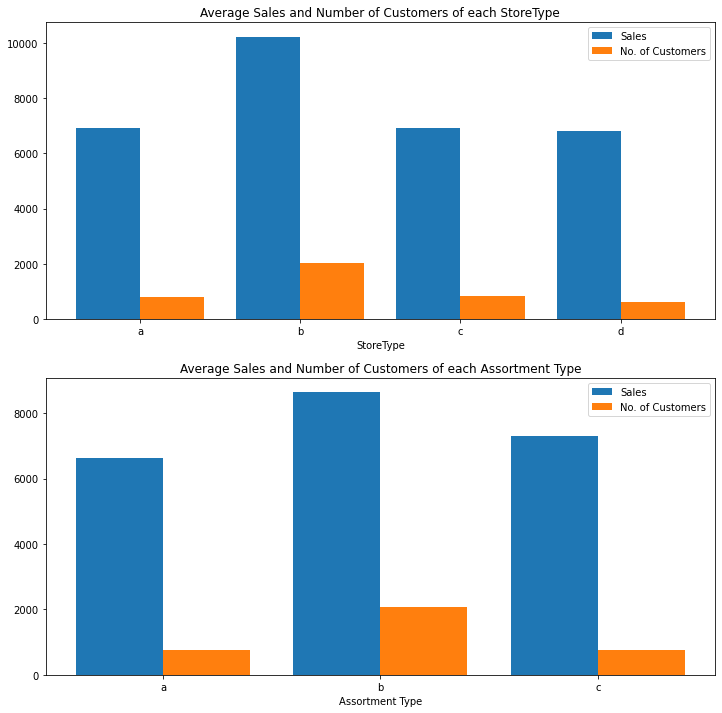

In [ ]:
plt.subplots(2,1, figsize=(12,12))

plt.subplot(2,1,1)
st = sales_df_all.groupby('StoreType')[['Sales','Customers']].mean()
X_axis = np.arange(len(st))

plt.bar(X_axis - 0.2, st['Sales'], 0.4, label = 'Sales')
plt.bar(X_axis + 0.2, st['Customers'], 0.4, label = 'No. of Customers')
plt.xticks(X_axis, st.index)
plt.xlabel('StoreType')
plt.title('Average Sales and Number of Customers of each StoreType')
plt.legend()

plt.subplot(2,1,2)
at = sales_df_all.groupby('Assortment')[['Sales','Customers']].mean()
X_axis1 = np.arange(len(at))

plt.bar(X_axis1 - 0.2, at['Sales'], 0.4, label = 'Sales')
plt.bar(X_axis1 + 0.2, at['Customers'], 0.4, label = 'No. of Customers')
plt.xticks(X_axis1, at.index)
plt.xlabel('Assortment Type')
plt.title('Average Sales and Number of Customers of each Assortment Type')
plt.legend()

plt.show()

# StoreType b and Assortment b have significantly higher sales and number of customers.

In [ ]:
sales_df_all['Year'] = pd.DatetimeIndex(sales_df_all['Date']).year
sales_df_all['Month'] = pd.DatetimeIndex(sales_df_all['Date']).month
sales_df_all['Day'] = pd.DatetimeIndex(sales_df_all['Date']).day

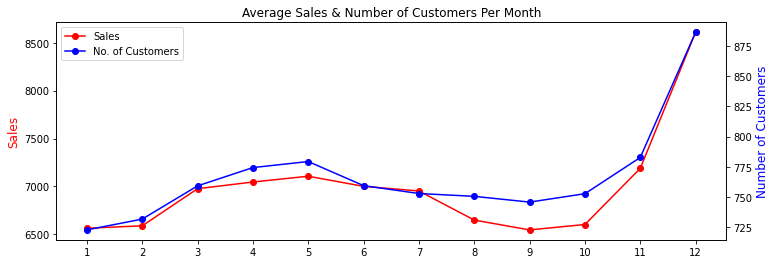

In [ ]:
# Look at average slaes and number of customers in different months
fig,ax = plt.subplots()

line1 = ax.plot(sales_df_all.groupby('Month')['Sales'].mean(),color='r', marker='o', label='Sales')
ax.set_title('Average Sales & Number of Customers Per Month')
ax.set_xticks(sales_df_all['Month'].unique())
ax.set_ylabel('Sales', color='r', fontsize=12)

ax2=ax.twinx()
line2 = ax2.plot(sales_df_all.groupby('Month')['Customers'].mean(),color='b', marker='o', label='No. of Customers')
ax2.set_ylabel('Number of Customers', color='b', fontsize=12)

labels=[i.get_label() for i in line1+line2]
ax.legend(line1+line2, labels, loc=0)
plt.show()

# December has the highest avearge sales and number of customers, much higher then other months. (Holiday season)

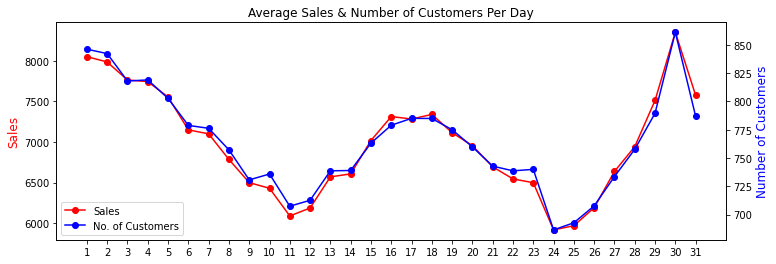

In [ ]:
# Average sales and no of customers of different days of months
fig,ax = plt.subplots()
line1 = ax.plot(sales_df_all.groupby('Day')['Sales'].mean(),color='r', marker='o', label='Sales')
ax.set_title('Average Sales & Number of Customers Per Day')
ax.set_xticks(sales_df_all['Day'].unique())
ax.set_ylabel('Sales', color='r', fontsize=12)

ax2=ax.twinx()
line2 = ax2.plot(sales_df_all.groupby('Day')['Customers'].mean(),color='b', marker='o', label='No. of Customers')
ax2.set_ylabel('Number of Customers', color='b', fontsize=12)

labels=[i.get_label() for i in line1+line2]
ax.legend(line1+line2, labels, loc=0)
plt.show()

# Average sales and numbers of customer show a very strong positive correlation.
# the 30th has the highest avearge sales and most customers. followed by 1st and 2nd. 

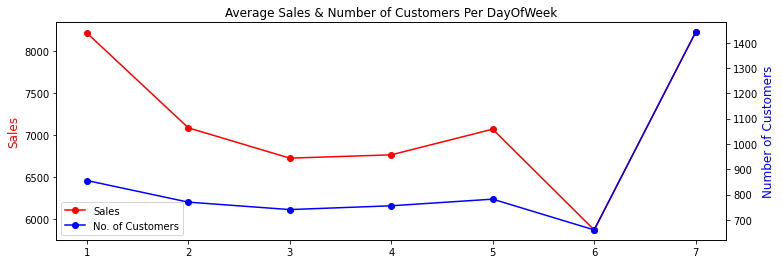

In [ ]:
# Average sales and no of customers of different days of week
fig,ax = plt.subplots()
line1 = ax.plot(sales_df_all.groupby('DayOfWeek')['Sales'].mean(),color='r', marker='o', label='Sales')
ax.set_title('Average Sales & Number of Customers Per DayOfWeek')
ax.set_xticks(sales_df_all['DayOfWeek'].unique())
ax.set_ylabel('Sales', color='r', fontsize=12)

ax2=ax.twinx()
line2 = ax2.plot(sales_df_all.groupby('DayOfWeek')['Customers'].mean(),color='b', marker='o', label='No. of Customers')
ax2.set_ylabel('Number of Customers', color='b', fontsize=12)

labels=[i.get_label() for i in line1+line2]
ax.legend(line1+line2, labels, loc=0)
plt.show()

# Sunday and Monday have the highest average sales.
# However, Sunday have the highest customer count (holiday of schools and most offices) while that of Monday is much lower.
# We can deduce that average purchase amount per customer is higher than Sunday. (Stress shopping due to Monday blue?)

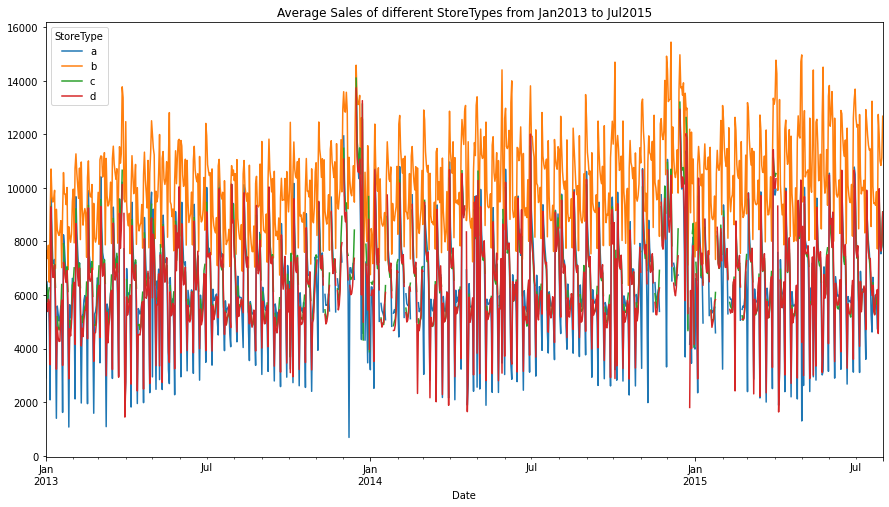

In [ ]:
# Look at avearge sales of store types
sales_df_all.groupby(['Date','StoreType']).mean()['Sales'].unstack().plot(figsize=(15,8))
plt.title('Average Sales of different StoreTypes from Jan2013 to Jul2015')
plt.show()

# StoreType b (orange line) has higher sales over the record time, while StoreType a (blue line) seems to have lower sales.

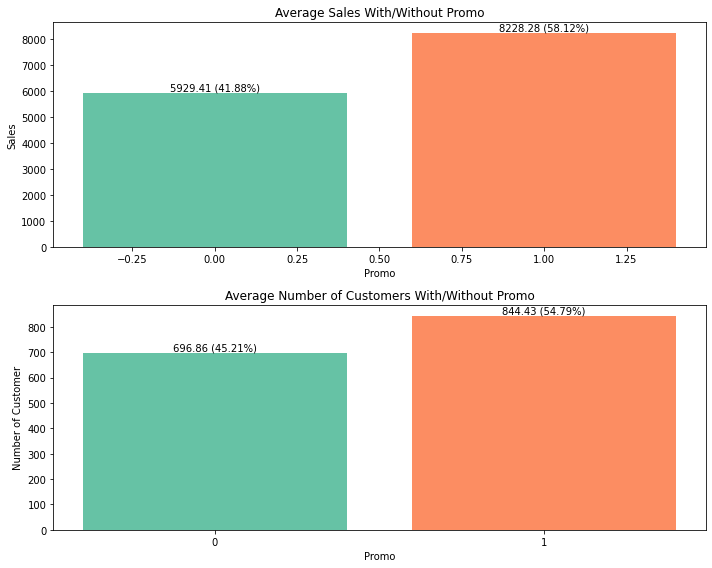

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(10,8))
a = sales_df_all.groupby('Promo')['Sales'].mean().sort_index()
bars=ax[0].bar(a.index, a.values,color=sns.color_palette("Set2"))
ax[0].bar_label(bars, labels=[str(round(j,2))+' ('+str(round(100*j/sum(a),2))+'%)' for j in a])
plt.xticks(a.index)
ax[0].set_xlabel('Promo')
ax[0].set_ylabel('Sales')
ax[0].set_title('Average Sales With/Without Promo')

b = sales_df_all.groupby('Promo')['Customers'].mean().sort_index()
bars=ax[1].bar(b.index, b.values,color=sns.color_palette("Set2"))
ax[1].bar_label(bars, labels=[str(round(j,2))+' ('+str(round(100*j/sum(b),2))+'%)' for j in b])
plt.xticks(b.index)
ax[1].set_xlabel('Promo')
ax[1].set_ylabel('Number of Customer')
ax[1].set_title('Average Number of Customers With/Without Promo')

plt.tight_layout()
plt.show()


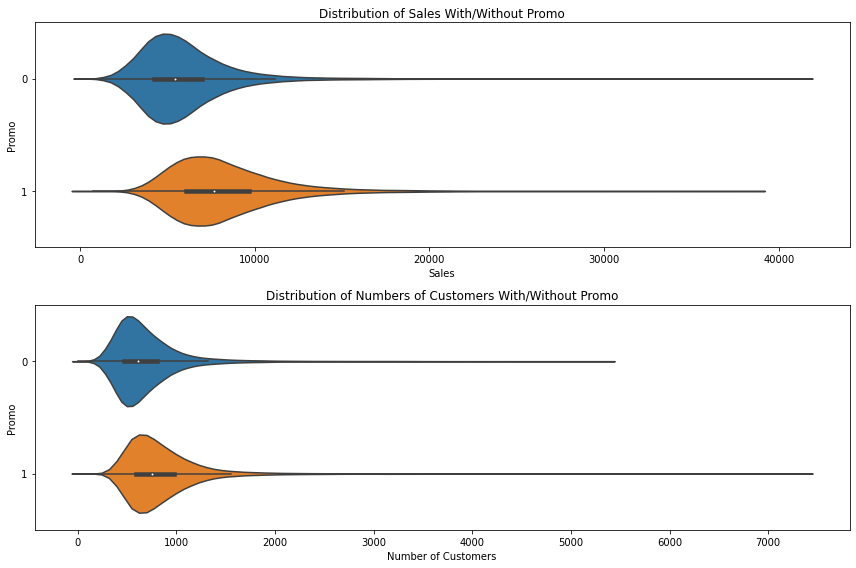

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(12,8))
plt.subplot(2,1,1)
sns.violinplot(x = 'Sales', y = 'Promo', data = sales_df_all)
plt.title('Distribution of Sales With/Without Promo')
plt.subplot(2,1,2)
sns.violinplot(x = 'Customers',y = 'Promo', data = sales_df_all)
plt.title('Distribution of Numbers of Customers With/Without Promo')
plt.xlabel('Number of Customers')

plt.tight_layout()
plt.show()

# Sales with Promo has more dispersed distribution than without promo, with higher median.
# The distribution of no. of customers moves right-ward with promotion. 
# Promo is able to attract customers, but the the impact to how much they spend varies.

In [ ]:
import pickle
pickle.dump(sales_df_all,open('data/sales_df_all.pickle','wb'))